In [1]:
# Import libraries
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader, Dataset, Subset
import torch.nn.functional as F

# A module to print a model summary (outputs shape, number of parameters, ...)
import torchsummary

# Tensorboard for visualization
from torch.utils.tensorboard import SummaryWriter

from tqdm import tqdm

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Custom modules and packages
import utils
import params.supervised_learning
import traversalcost.utils
from dataset import SupervisedNetworkDataset
from model import SupervisedNetwork 
from loss import SupervisedLoss 
from train import train
from validate import validate
from test import test_supervised

## Prepare data

In [2]:
print(params.supervised_learning.DATASET)

../datasets/dataset_big_DS_test/


In [3]:
# Create a Dataset for training
train_set = SupervisedNetworkDataset(params.supervised_learning.DATASET + "traversalcosts_train.csv",
                                params.supervised_learning.DATASET + "/features")

        
# Create a Dataset for testing
test_set = SupervisedNetworkDataset(params.supervised_learning.DATASET +"traversalcosts_test.csv",
                                params.supervised_learning.DATASET + "features")

In [4]:
# Combine a dataset and a sampler, and provide an iterable over the dataset
# (setting shuffle argument to True calls a RandomSampler, and avoids to
# have to create a Sampler object)

train_loader = DataLoader(
    train_set,
    batch_size= params.supervised_learning.BATCH_SIZE,
    shuffle=True,
    num_workers=12,  # Asynchronous data loading and augmentation
    pin_memory=True,  # Increase the transferring speed of the data to the GPU
)

test_loader = DataLoader(
    test_set,
    batch_size= params.supervised_learning.BATCH_SIZE,
    shuffle=True,
    num_workers=12,  # Asynchronous data loading and augmentation
    pin_memory=True,  # Increase the transferring speed of the data to the GPU
)

## GPU ?

In [5]:
# Use a GPU if available
# device = "cpu"
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}\n")

Device: cuda



In [6]:
# Create a model
model = SupervisedNetwork().to(device=device)

criterion = SupervisedLoss().to(device=device)

In [7]:
#Creating list for plot afterwards

List_train_loss_value = []
List_test_loss_value = []

optimizer = optim.SGD(model.parameters(),
                      lr=params.supervised_learning.LEARNING_RATE,
                      momentum=params.supervised_learning.MOMENTUM,
                      weight_decay=params.supervised_learning.WEIGHT_DECAY)

# Loop over the epochs

for epoch in range(params.supervised_learning.NB_EPOCHS):
    
    # Training
    train_loss = train(model,
                       device,
                       train_loader,
                       optimizer,
                       criterion,
                       epoch)
    
    # Validation
    val_loss = validate(model,
                        device,
                        test_loader,
                        criterion,
                        epoch) 
    
    print("Train loss: ", train_loss)
    print("Validation loss: ", val_loss)
    
    # Store the computed losses
    List_train_loss_value.append(train_loss)
    List_test_loss_value.append(val_loss)
    

  0%|          | 0/173 [00:00<?, ?batch/s]

/home/student/Desktop/Stage ENSTA/Internship-U2IS/src/traversal_cost/supervised_network/loss.py:20: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(estimated_cost, real_cost)
/home/student/Desktop/Stage ENSTA/Internship-U2IS/src/traversal_cost/supervised_network/loss.py:20: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(estimated_cost, real_cost)


  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.4833571645135135
Validation loss:  0.38472839556634425


/home/student/Desktop/Stage ENSTA/Internship-U2IS/src/traversal_cost/supervised_network/loss.py:20: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(estimated_cost, real_cost)


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.37612734056707753
Validation loss:  0.41671946570277213


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.3754089079969536
Validation loss:  0.3806836689822376


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.37563602449749245
Validation loss:  0.39334707148373127


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.37540683221351895
Validation loss:  0.3931396283209324


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.3738728433395225
Validation loss:  0.402989337593317


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.37525827637900505
Validation loss:  0.38900299640372393


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.37453284618482424
Validation loss:  0.4113971687853336


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.37517125653964334
Validation loss:  0.38352989237755536


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.3732901578984423
Validation loss:  0.42428510934114455


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.37391262016975124
Validation loss:  0.4245831023901701


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.3748065813126936
Validation loss:  0.3799219770357013


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.3740628858479117
Validation loss:  0.4018329370766878


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.3733604285715288
Validation loss:  0.3904938992112875


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.37254018577709364
Validation loss:  0.39101661457680165


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.3701485268061044
Validation loss:  0.41144135817885397


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.37231093307020346
Validation loss:  0.3830177215859294


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.3741098263790842
Validation loss:  0.3956325754523277


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.3730473684394635
Validation loss:  0.41152075454592707


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.37497054729503015
Validation loss:  0.4258916325867176


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.37360587382333815
Validation loss:  0.4263274252414703


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.3714847192168236
Validation loss:  0.3966921903192997


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.36985261455135193
Validation loss:  0.3855312177183805


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.3746507511059673
Validation loss:  0.4091132089495659


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.3713821639990531
Validation loss:  0.3943250048905611


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.37319158187749757
Validation loss:  0.3962462220340967


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.3748030666843315
Validation loss:  0.3882990127429366


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.37209259079112483
Validation loss:  0.39300154596567155


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.3691640588847888
Validation loss:  0.38830269072204826


  0%|          | 0/173 [00:00<?, ?batch/s]

  0%|          | 0/20 [00:00<?, ?batch/s]

Train loss:  0.3713156521384943
Validation loss:  0.3909854093566537


## Visualization 

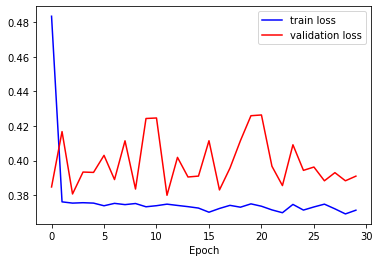

In [8]:
plt.plot(range(params.supervised_learning.NB_EPOCHS), List_train_loss_value, "b", label="train loss")

plt.plot(range(params.supervised_learning.NB_EPOCHS), List_test_loss_value, "r", label="validation loss")

plt.xlabel("Epoch")
plt.legend()

## Testing

In [9]:
# Test the model
test_loss = test_supervised(model,
                 device,
                 test_loader,
                 criterion)

print("Test loss: ", test_loss)

predicted_cost is tensor([[1.0732],
        [1.1746],
        [1.2024],
        [1.1156],
        [1.1758]], device='cuda:0')
real cost is tensor([1.4500, 1.1700, 1.6000, 0.6600, 1.2000], device='cuda:0')
predicted_cost is tensor([[1.1731],
        [1.1821],
        [0.9728],
        [0.9744],
        [0.9766]], device='cuda:0')
real cost is tensor([1.4400, 3.0000, 0.3500, 0.2000, 0.2000], device='cuda:0')
predicted_cost is tensor([[1.0602],
        [1.0126],
        [1.1525],
        [1.1769],
        [1.0549]], device='cuda:0')
real cost is tensor([0.8400, 0.8700, 0.3900, 1.4000, 0.7200], device='cuda:0')
predicted_cost is tensor([[1.0085],
        [1.1695],
        [1.2142],
        [1.1329],
        [1.2043]], device='cuda:0')
real cost is tensor([0.4000, 0.3900, 1.2400, 1.8000, 1.5500], device='cuda:0')
predicted_cost is tensor([[1.0076],
        [1.1602],
        [1.0991],
        [1.0402],
        [1.1765]], device='cuda:0')
real cost is tensor([0.3500, 1.6800, 1.6000, 0.4400, 1

In [10]:
costs_df = traversalcost.utils.compute_traversal_costs(
    dataset=params.supervised_learning.DATASET,
    cost_function=model.to(device="cpu"),
    to_tensor=True
)

<Figure size 432x288 with 0 Axes>

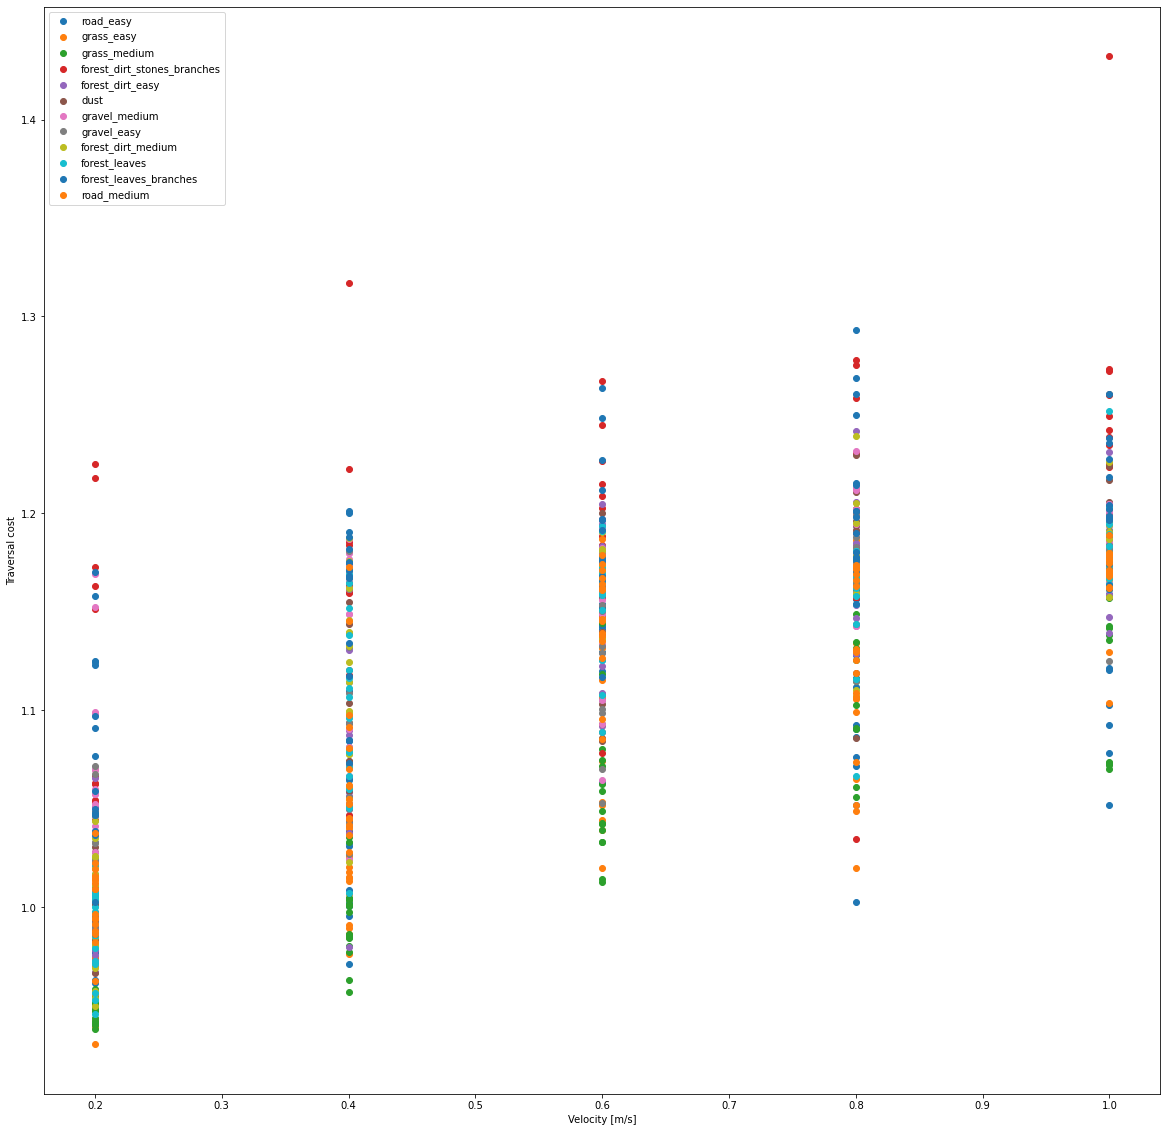

In [12]:
# Display the traversal costs
#plt.figure(figsize=(10))

cost_graph = traversalcost.utils.display_traversal_costs(costs_df)

## Save model parameters

In [ ]:
# Save the model parameters
#torch.save(model.state_dict(), "siamese.params")